In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [73]:

data_train=pd.read_csv("C:/Users/Dell/Downloads/Train (1).csv",na_values=None)
data_test=pd.read_csv("C:/Users/Dell/Downloads/Test (1).csv",na_values=None)


In [74]:
data_train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [75]:
y=data_train.Global_Sales

In [76]:
data=pd.concat([data_train,data_test],ignore_index=True)
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Theresia...,DS,2008.0,Adventure,Arc System Works,0.05,0.00,0.00,61.0,6.0,8,8.0,WorkJam,M,NaN
16715,Sacred 2: Fallen Angel,PC,2008.0,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.00,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M,NaN
16716,Dance Sensation!,Wii,2010.0,Misc,Majesco Entertainment,0.06,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16717,Adventure Time: The Secret of the Nameless Kin...,X360,2014.0,Action,Little Orbit,0.00,0.05,0.00,58.0,5.0,7.5,4.0,WayForward,E10+,NaN


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       10015 non-null  object 
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.9+ MB


In [78]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Global_Sales       2143
dtype: int64

<h1>contineous data
    <h3>
        1.Year_of_release
        2.NA_sales
        3.EU_sales
        4.JP_Sales
        5.Critic_Score
        6.Critic_Count
        7.User_Count
        
    </h3>   
#note:
        we are converting year_of_release to integer from float

In [79]:
data.Year_of_Release.unique

<bound method Series.unique of 0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2008.0
16715    2008.0
16716    2010.0
16717    2014.0
16718    2005.0
Name: Year_of_Release, Length: 16719, dtype: float64>

In [80]:
data["Year_of_Release"]=data["Year_of_Release"].fillna(0).astype(int)
print(data)

                                                    Name Platform  \
0                                             Wii Sports      Wii   
1                                      Super Mario Bros.      NES   
2                                         Mario Kart Wii      Wii   
3                                      Wii Sports Resort      Wii   
4                               Pokemon Red/Pokemon Blue       GB   
...                                                  ...      ...   
16714                                        Theresia...       DS   
16715                             Sacred 2: Fallen Angel       PC   
16716                                   Dance Sensation!      Wii   
16717  Adventure Time: The Secret of the Nameless Kin...     X360   
16718   Teenage Mutant Ninja Turtles 3: Mutant Nightmare       DS   

       Year_of_Release         Genre                     Publisher  NA_Sales  \
0                 2006        Sports                      Nintendo     41.36   
1          

In [81]:
data.Year_of_Release.unique

<bound method Series.unique of 0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2008
16715    2008
16716    2010
16717    2014
16718    2005
Name: Year_of_Release, Length: 16719, dtype: int32>

In [82]:
 data.duplicated().sum()                                                           

0

In [83]:
data.drop_duplicates(keep=False,inplace=True)

In [84]:
data.NA_Sales.describe()

count    16719.000000
mean         0.263330
std          0.813514
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_Sales, dtype: float64

In [85]:
q3=data.NA_Sales.quantile(0.75)
q1=data.NA_Sales.quantile(0.25)
iqr=q3-q1

In [86]:
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)

In [87]:
data[(data.NA_Sales<UE)&(data.NA_Sales>LE)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
138,World of Warcraft,PC,2004,Role-Playing,Activision,0.08,6.21,0.00,93.0,57.0,7.3,2182.0,Blizzard Entertainment,T,6.29
163,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.55,4.13,81.0,48.0,8.7,124.0,Capcom,T,5.48
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,NaN,NaN,NaN,NaN,NaN,NaN,4.87
244,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,NaN,NaN,NaN,NaN,NaN,NaN,4.47
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,0.10,2.39,1.05,86.0,19.0,8.9,33.0,Konami,E,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Theresia...,DS,2008,Adventure,Arc System Works,0.05,0.00,0.00,61.0,6.0,8,8.0,WorkJam,M,NaN
16715,Sacred 2: Fallen Angel,PC,2008,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.00,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M,NaN
16716,Dance Sensation!,Wii,2010,Misc,Majesco Entertainment,0.06,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16717,Adventure Time: The Secret of the Nameless Kin...,X360,2014,Action,Little Orbit,0.00,0.05,0.00,58.0,5.0,7.5,4.0,WayForward,E10+,NaN


In [88]:
data.EU_Sales.describe()

count    16719.000000
mean         0.145025
std          0.503283
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_Sales, dtype: float64

In [89]:
data.JP_Sales.describe()

count    16719.000000
mean         0.077602
std          0.308818
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [90]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 17., 13., 21., 22.])

In [91]:
data.Critic_Score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [92]:

 data.Critic_Score.fillna('68.967679',inplace=True)


In [93]:
data.User_Count.describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

In [94]:
 data['User_Count'].isna().sum()


9129

In [95]:

data.User_Count.fillna('162.229908',inplace=True)



In [96]:
data.Critic_Count.describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

In [97]:
data['Critic_Count'].isna().sum()


8582

In [98]:

data.Critic_Count.fillna('26.360821',inplace=True)



In [99]:
data.Critic_Count.describe()

count         16719
unique          107
top       26.360821
freq           8582
Name: Critic_Count, dtype: object

<h1>DISCRETE DATAS
    <h2>
        
        1.Platform
        2.Genre
        3.Publisher
        4.Developer
        5.Rating
        6.User_Score
    </h2>

In [100]:
data.Platform.describe

<bound method NDFrame.describe of 0         Wii
1         NES
2         Wii
3         Wii
4          GB
         ... 
16714      DS
16715      PC
16716     Wii
16717    X360
16718      DS
Name: Platform, Length: 16719, dtype: object>

In [101]:
data.Platform.fillna("others")


0         Wii
1         NES
2         Wii
3         Wii
4          GB
         ... 
16714      DS
16715      PC
16716     Wii
16717    X360
16718      DS
Name: Platform, Length: 16719, dtype: object

In [102]:
data.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [103]:
data.Genre.isnull().sum()

2

In [104]:
data.mode()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Need for Speed: Most Wanted,PS2,2008,Action,Electronic Arts,0.0,0.0,0.0,68.967679,26.360821,tbd,162.229908,Ubisoft,E,0.02


In [105]:
data.Genre.fillna("Action")
                                                                

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16714       Adventure
16715    Role-Playing
16716            Misc
16717          Action
16718          Action
Name: Genre, Length: 16719, dtype: object

In [106]:
data.Genre.isnull().sum()

2

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

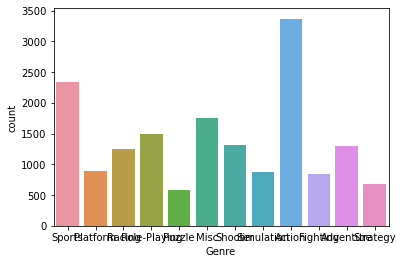

In [107]:
sns.countplot(data.Genre)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform', ylabel='count'>

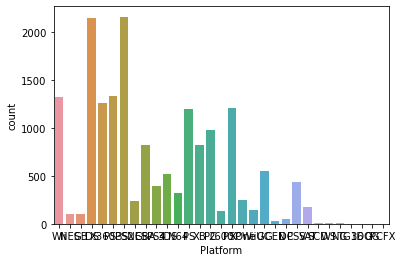

In [108]:
sns.countplot(data.Platform)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

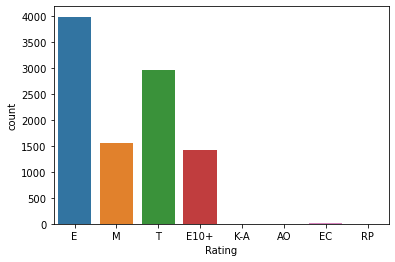

In [109]:
sns.countplot(data.Rating)

In [110]:
data.User_Score.describe()

count     10015
unique       96
top         tbd
freq       2425
Name: User_Score, dtype: object

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User_Score', ylabel='count'>

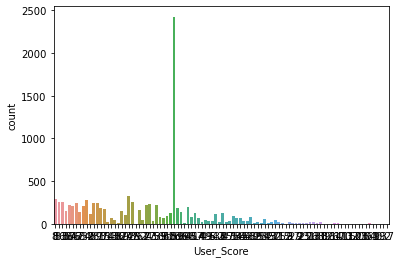

In [111]:

sns.countplot(data.User_Score)

In [112]:
data.Rating.describe

<bound method NDFrame.describe of 0           E
1         NaN
2           E
3           E
4         NaN
         ... 
16714       M
16715       M
16716     NaN
16717    E10+
16718       E
Name: Rating, Length: 16719, dtype: object>

In [113]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [114]:
data['Rating'] = data['Rating'].replace('K-A', 'E').fillna('RP')
print('NaN in the Rating - {}'.format(
  data['Rating'].isna().sum()))

NaN in the Rating - 0


In [115]:
data.User_Score.describe()

count     10015
unique       96
top         tbd
freq       2425
Name: User_Score, dtype: object

In [116]:
data['User_Score']=pd.to_numeric(data["User_Score"],errors='coerce')
data=data.replace(np.nan,0,regex=True)

In [117]:
data.User_Score.mode()

0    0.0
dtype: float64

In [118]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8.0,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,68.967679,26.360821,0.0,162.229908,0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,68.967679,26.360821,0.0,162.229908,0,RP,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Theresia...,DS,2008,Adventure,Arc System Works,0.05,0.00,0.00,61.0,6.0,8.0,8.0,WorkJam,M,0.00
16715,Sacred 2: Fallen Angel,PC,2008,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.00,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M,0.00
16716,Dance Sensation!,Wii,2010,Misc,Majesco Entertainment,0.06,0.00,0.00,68.967679,26.360821,0.0,162.229908,0,RP,0.00
16717,Adventure Time: The Secret of the Nameless Kin...,X360,2014,Action,Little Orbit,0.00,0.05,0.00,58.0,5.0,7.5,4.0,WayForward,E10+,0.00


In [119]:
data.User_Score.describe()

count    16719.000000
mean         3.234589
std          3.688653
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: User_Score, dtype: float64

In [120]:
from sklearn.preprocessing import normalize

In [121]:

idata=data.drop(['Name','Publisher','Developer'],axis=1)

In [161]:
dummy=pd.get_dummies(idata)
dummy

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,User_Score,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,...,User_Count_10179.0,User_Count_10665.0,User_Count_162.229908,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_M,Rating_RP,Rating_T
0,2006,41.36,28.96,3.77,8.0,82.53,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1985,29.08,3.58,6.81,0.0,40.24,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2008,15.68,12.76,3.79,8.3,35.52,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009,15.61,10.93,3.28,8.0,32.77,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1996,11.27,8.89,10.22,0.0,31.37,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2008,0.05,0.00,0.00,8.0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16715,2008,0.00,0.05,0.00,6.9,0.00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16716,2010,0.06,0.00,0.00,0.0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
16717,2014,0.00,0.05,0.00,7.5,0.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
y=dummy['Global_Sales']
x=dummy.drop('Global_Sales',axis=1)

In [163]:
x


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,User_Score,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,User_Count_10179.0,User_Count_10665.0,User_Count_162.229908,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_M,Rating_RP,Rating_T
0,2006,41.36,28.96,3.77,8.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1985,29.08,3.58,6.81,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2008,15.68,12.76,3.79,8.3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009,15.61,10.93,3.28,8.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1996,11.27,8.89,10.22,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2008,0.05,0.00,0.00,8.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16715,2008,0.00,0.05,0.00,6.9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16716,2010,0.06,0.00,0.00,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
16717,2014,0.00,0.05,0.00,7.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [164]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [165]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134
0,0.125913,50.518992,57.255699,11.956905,1.291949,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,-1.096707,-0.007734,1.784945,-0.304658,-0.02188,-0.321135,-0.825111,-0.463918
1,0.042752,35.423530,6.825337,21.801182,-0.876929,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,0.911820,-0.007734,-0.560241,-0.304658,-0.02188,-0.321135,1.211958,-0.463918
2,0.133833,18.951283,25.066106,12.021669,1.373282,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,-1.096707,-0.007734,1.784945,-0.304658,-0.02188,-0.321135,-0.825111,-0.463918
3,0.137793,18.865234,21.429874,10.370162,1.291949,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,-1.096707,-0.007734,1.784945,-0.304658,-0.02188,-0.321135,-0.825111,-0.463918
4,0.086313,13.530193,17.376370,32.843612,-0.876929,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,0.911820,-0.007734,-0.560241,-0.304658,-0.02188,-0.321135,1.211958,-0.463918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.133833,-0.262241,-0.288166,-0.251295,1.291949,-0.089548,-0.013397,-0.179167,-0.055856,2.601740,...,-0.007734,-0.007734,-1.096707,-0.007734,-0.560241,-0.304658,-0.02188,3.113958,-0.825111,-0.463918
16715,0.133833,-0.323705,-0.188815,-0.251295,0.993729,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,-1.096707,-0.007734,-0.560241,-0.304658,-0.02188,3.113958,-0.825111,-0.463918
16716,0.141753,-0.249948,-0.288166,-0.251295,-0.876929,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,0.911820,-0.007734,-0.560241,-0.304658,-0.02188,-0.321135,1.211958,-0.463918
16717,0.157593,-0.323705,-0.188815,-0.251295,1.156395,-0.089548,-0.013397,-0.179167,-0.055856,-0.384358,...,-0.007734,-0.007734,-1.096707,-0.007734,-0.560241,3.282369,-0.02188,-0.321135,-0.825111,-0.463918


In [167]:
data_train.shape

(14576, 15)

In [168]:
data_test.shape

(0, 15)

In [169]:
data_test=dummy[14576:]

In [170]:
data_train=dummy[:14576]

<h1> linear regression

In [171]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,test_size=0.2, random_state=25)


In [172]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [173]:
abc=model.score(test_x,test_y)

In [174]:
abc

-4.557570139741565e+25

<h1> RANDOM FOREST REGRESSOR

In [178]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,test_size=0.2, random_state=25)

In [179]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [180]:
pred_y=model.predict(test_x)
pred_y

array([0.02  , 0.0209, 0.02  , ..., 1.2048, 0.1974, 0.0711])

In [206]:
era=pd.DataFrame(pred_y)

In [207]:
print("train score=",model.score(train_x,train_y))

train score= 0.9869315795181117


In [208]:
print("test score=",model.score(test_x,test_y))

test score= 0.960524878785542


In [209]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(test_y,pred_y)
rmse


0.1298302942194095

<h1> DECISION TREE

In [184]:
modeldtc = tree.DecisionTreeRegressor(random_state=42)
modeldtc.fit(train_x,train_y)

DecisionTreeRegressor(random_state=42)

In [185]:
de=modeldtc.score(test_x,test_y)

In [186]:
de

0.364870238852919

<h1>gradient booster

In [187]:
model1=GradientBoostingRegressor(random_state=42)

In [188]:
model1.fit(train_x,train_y)

GradientBoostingRegressor(random_state=42)

In [189]:
ijk=model1.score(test_x,test_y)

In [190]:
ijk

0.9793900566853208

<h1>AdaBoostRegressor

In [199]:
reg = AdaBoostRegressor(n_estimators=100, random_state=42)
reg.fit(train_x,train_y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(n_estimators=100, random_state=42)

In [200]:
lmn=reg.score(test_x,test_y)

In [201]:
lmn

0.11402592710959758

<h1> CONCLUSION
    <h2>  Random forest regressor is the best model

In [212]:
era.to_csv("kirkev.csv")